In [3]:
# Import libraries
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [4]:
# Load dataset
url = "healthy_lifestyle_city_2021 - healthy_lifestyle_city_2021.csv"
data = pd.read_csv(url)

In [5]:
data = data[['Sunshine hours(City)','Annual avg. hours worked']]
data.head(25)

,Sunshine hours(City),Annual avg. hours worked
0,1858,1434
1,2636,1712
2,1884,1501
3,1821,1452
4,1630,1380
5,1662,1540
6,2769,1644
7,1626,1386
8,2591,1686
9,1938,1670


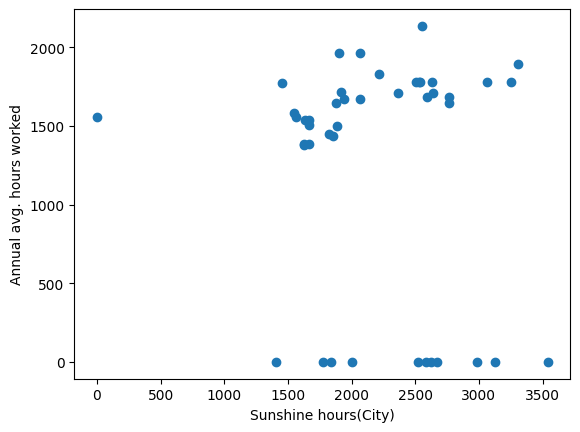

In [6]:

f1 = data['Sunshine hours(City)'].values
f2 = data['Annual avg. hours worked'].values

X = np.array(list(zip(f1, f2)))

# Visualisasi data point
plt.scatter(f1, f2)
plt.xlabel('Sunshine hours(City)')
plt.ylabel('Annual avg. hours worked')
plt.show()

In [7]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi Method
encoder = LabelEncoder()

# Looping
for c in data.columns[0:]:  
    if(data[c].dtype=='object'): # if column type = object (like "Tiket" and "Sex")
        data[c] = encoder.fit_transform(data[c])
    else: # else get the self column value without encode
        data[c] = data[c]



In [8]:
# Menentukan nilai yang tepat untuk cluster
X = np.array(list(zip(f1, f2))).reshape(len(f1), 2)
# print(X)
SSE = []
K = range(1,10)
for k in K:
  kmeanModel = KMeans(n_clusters=k).fit(X)
  kmeanModel.fit(X)
  SSE.append(kmeanModel.inertia_)

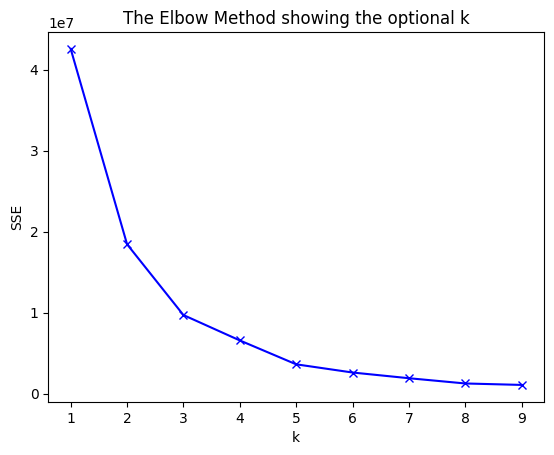

In [9]:
# Plot nilai K untuk mencari elbow
plt.plot(K, SSE, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('The Elbow Method showing the optional k')
plt.show()

In [23]:
# Melakukan clustering
from sklearn.cluster import KMeans

# Menentukan jumlah cluster
kmeans = KMeans(n_clusters=3)

# Fitting input data
kmeans = kmeans.fit(X)

# Mendapatkan cluster labels
labels = kmeans.predict(X)

# Mendapatkan nilai centroid
C = kmeans.cluster_centers_
y_kmeans = kmeans.fit_predict(X)
# Mencetak nilai centroid
print(C)

[[1671.89473684 1590.78947368]
 [2461.18181818    0.        ]
 [2695.21428571 1784.35714286]]


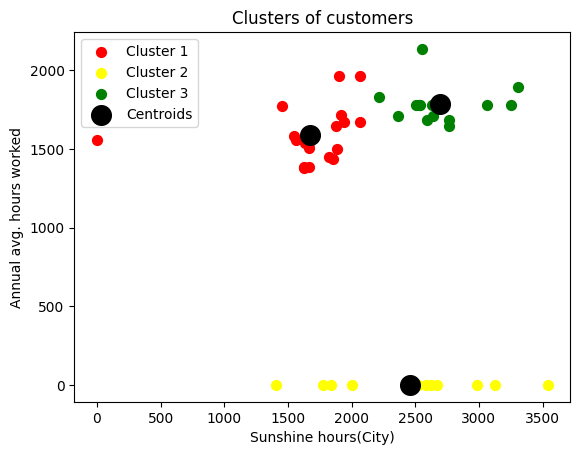

In [26]:
plt.scatter(data[y_kmeans == 0]['Sunshine hours(City)'], data[y_kmeans == 0]['Annual avg. hours worked'], s=50, c='red', label='Cluster 1')
plt.scatter(data[y_kmeans == 1]['Sunshine hours(City)'], data[y_kmeans == 1]['Annual avg. hours worked'], s=50, c='yellow', label='Cluster 2')
plt.scatter(data[y_kmeans == 2]['Sunshine hours(City)'], data[y_kmeans == 2]['Annual avg. hours worked'], s=50, c='green', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Sunshine hours(City)')
plt.ylabel('Annual avg. hours worked')
plt.legend()
plt.show()

In [27]:
data['Cluster'] = y_kmeans

In [28]:
data.head(10)

,Sunshine hours(City),Annual avg. hours worked,Cluster
0,1858,1434,0
1,2636,1712,2
2,1884,1501,0
3,1821,1452,0
4,1630,1380,0
5,1662,1540,0
6,2769,1644,2
7,1626,1386,0
8,2591,1686,2
9,1938,1670,0


In [14]:
# Data type of the Cluster column
data['Cluster'].dtype

dtype('int32')

In [15]:
data['Cluster'].unique()

array([0, 2, 1])

In [16]:
import pickle
pickle.dump(kmeans, open('model.pkl', 'wb'))